# <center>"Indonesia Smart City Happiness Prediction"

## Dataset: The "Indonesia Smart City" Dataset

The "Indonesia Smart City" dataset is a comprehensive collection of data features related to smart city implementations across various cities and regencies in Indonesia. The data spans the years 2022 to 2023, providing valuable insights into various aspects of smart city initiatives during this period.

## Project Topic

In this project, we will focus on regression analysis using the "Indonesia Smart City" dataset. Our goal is to apply regression techniques to predict certain key metrics related to smart city implementations. Specifically, we will use the Mean Squared Error (MSE) method to evaluate the performance of our regression models.

Let's begin by loading the dataset and exploring its features.


# **1.   IMPORT LIBRARY**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split


# **2.   LOAD DATASET**

In [ ]:
import os
import shutil


current_dir = os.getcwd()  
kaggle_json_path = os.path.join(current_dir, 'kaggle.json')  
kaggle_dir = os.path.join(os.path.expanduser('~'), '.kaggle')  

os.makedirs(kaggle_dir, exist_ok=True)

shutil.copy(kaggle_json_path, os.path.join(kaggle_dir, 'kaggle.json'))

print("kaggle.json has been moved to ~/.kaggle and permissions set.")

kaggle.json has been moved to ~/.kaggle and permissions set.


In [3]:
# Install Kaggle API
!pip install kaggle

# Download dataset
!kaggle competitions download -c preliminary-round-fit-competition-2024

# Unzip dataset
import zipfile

with zipfile.ZipFile('preliminary-round-fit-competition-2024.zip', 'r') as zip_ref:
    zip_ref.extractall('preliminary-round-fit-competition-2024')


preliminary-round-fit-competition-2024.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
train_df = pd.read_csv('preliminary-round-fit-competition-2024/train.csv')
test_df = pd.read_csv('preliminary-round-fit-competition-2024/test.csv')
sample_submission_df = pd.read_csv('preliminary-round-fit-competition-2024/sample_submission.csv')

print(f"Train dataset shape: {train_df.shape}")
print(f"Test dataset shape: {test_df.shape}")

Train dataset shape: (822, 13)
Test dataset shape: (206, 12)


In [5]:
print("Train Data Info:")
print(train_df.info())
print("\nTrain Data Description:")
print(train_df.describe())
print("\nMissing Values in Train Data:")
print(train_df.isnull().sum())

Train Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 13 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               822 non-null    int64  
 1   city_or_regency                  822 non-null    object 
 2   year                             822 non-null    int64  
 3   total_area (km2)                 822 non-null    object 
 4   population                       822 non-null    object 
 5   densities                        822 non-null    float64
 6   traffic_density                  822 non-null    object 
 7   green_open_space                 434 non-null    object 
 8   hdi                              822 non-null    float64
 9   gross_regional_domestic_product  822 non-null    object 
 10  total_landfills                  420 non-null    float64
 11  solid_waste_generated            428 non-null    object 
 12  happi

**2.2 Visualisasi Data Awal**

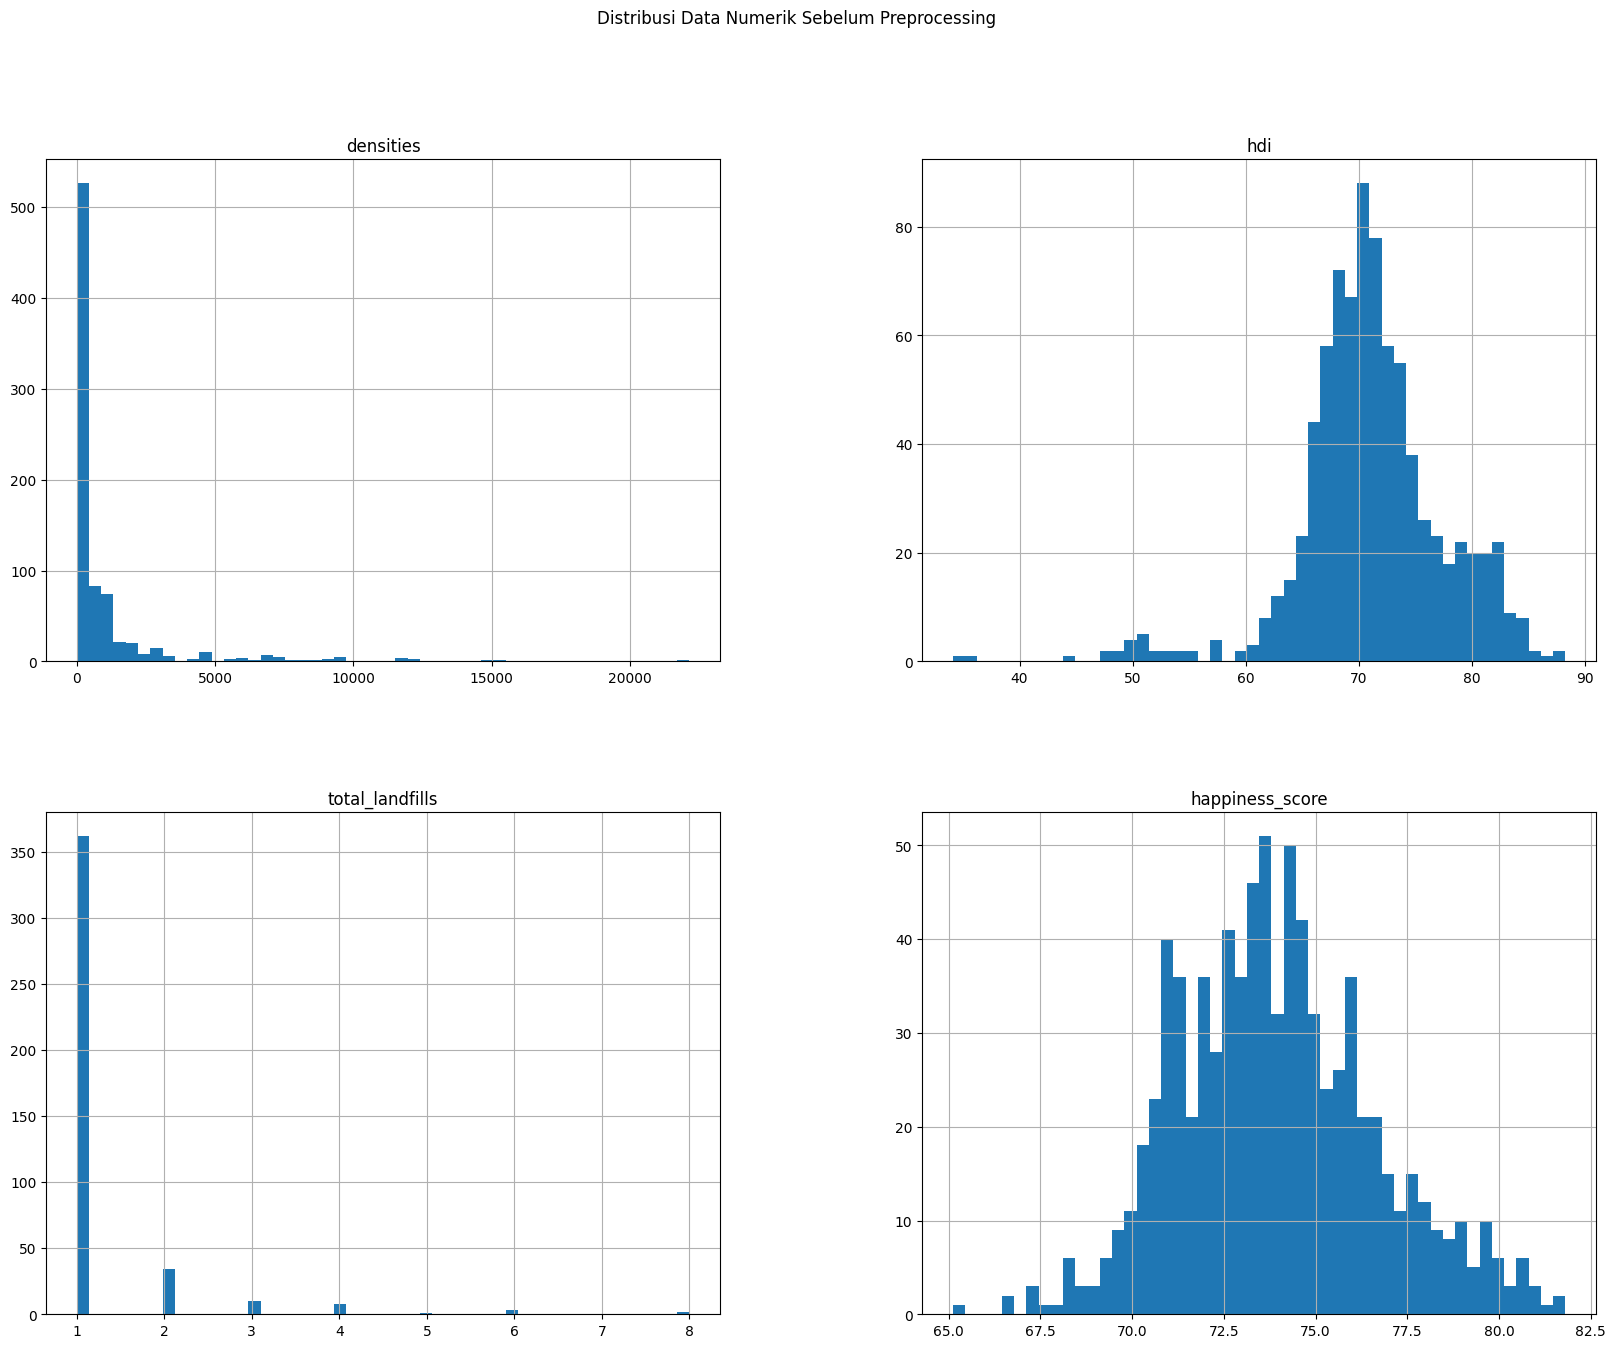

In [6]:
# Visualisasi distribusi data numerik
train_df[['densities', 'green_open_space', 'hdi', 'gross_regional_domestic_product', 'total_landfills', 'happiness_score']].hist(bins=50, figsize=(20, 15))
plt.suptitle("Distribusi Data Numerik Sebelum Preprocessing")
plt.show()

**1.2. Boxplot untuk Outlier**

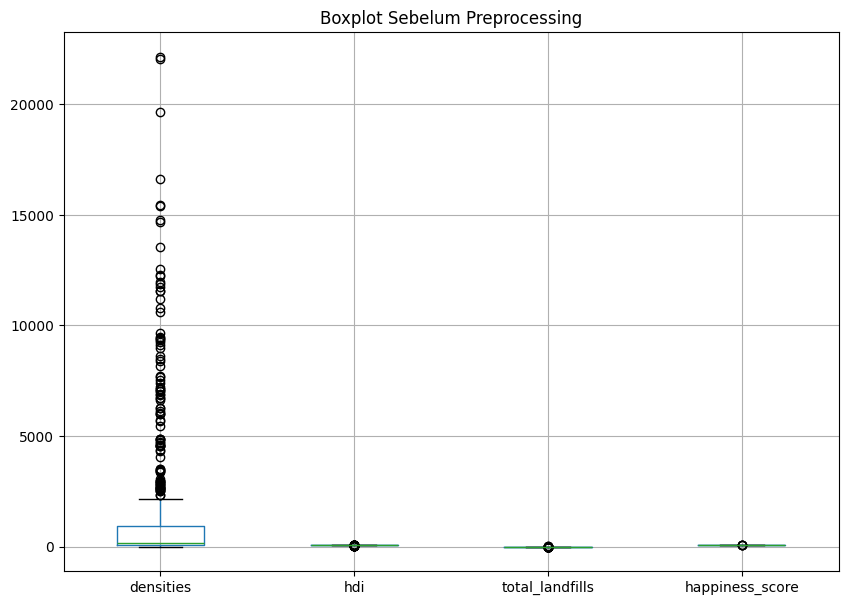

In [7]:
# Boxplot untuk fitur numerik
train_df.boxplot(column=['densities', 'hdi', 'total_landfills', 'happiness_score'], figsize=(10, 7))
plt.title("Boxplot Sebelum Preprocessing")
plt.show()


# **3.   Preprocessing**


**3.1 Data Cleaning**

In [8]:
# Rename columns: replace spaces and problematic characters
train_df.columns = train_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')
test_df.columns = test_df.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

# Show updated columns
print("\nUpdated Columns:")
print(train_df.columns)


Updated Columns:
Index(['id', 'city_or_regency', 'year', 'total_area_km2', 'population',
       'densities', 'traffic_density', 'green_open_space', 'hdi',
       'gross_regional_domestic_product', 'total_landfills',
       'solid_waste_generated', 'happiness_score'],
      dtype='object')


In [ ]:
# Cleaning
def clean_numeric_columns(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col] = df[col].str.replace(',', '', regex=False)
            df[col] = df[col].replace('#REF!', np.nan)
            try:
                df[col] = df[col].astype(float)
            except:
                pass
    return df

train_df = clean_numeric_columns(train_df)
test_df = clean_numeric_columns(test_df)

# Check data types again
print("\nData Types After Cleaning:")
print(train_df.dtypes)
print(train_df.head())


Data Types After Cleaning:
id                                   int64
city_or_regency                     object
year                                 int64
total_area_km2                     float64
population                         float64
densities                          float64
traffic_density                     object
green_open_space                   float64
hdi                                float64
gross_regional_domestic_product    float64
total_landfills                    float64
solid_waste_generated              float64
happiness_score                    float64
dtype: object
         id city_or_regency  year  total_area_km2  population  densities  \
0  11012022        Simeulue  2022         1838.09     94876.0      51.62   
1  11032022    Aceh Selatan  2022         4173.82    237376.0      56.87   
2  11042022   Aceh Tenggara  2022         4242.04    228308.0      53.82   
3  11062022     Aceh Tengah  2022         4527.53    222673.0      49.18   
4  11072022      Ac

In [10]:
# Identify numeric and categorical features
numeric_features = train_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = train_df.select_dtypes(exclude=[np.number]).columns.tolist()

print("\nNumeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['id', 'year', 'total_area_km2', 'population', 'densities', 'green_open_space', 'hdi', 'gross_regional_domestic_product', 'total_landfills', 'solid_waste_generated', 'happiness_score']
Categorical Features: ['city_or_regency', 'traffic_density']


**3.2 HANDLE MISSING VALUES**

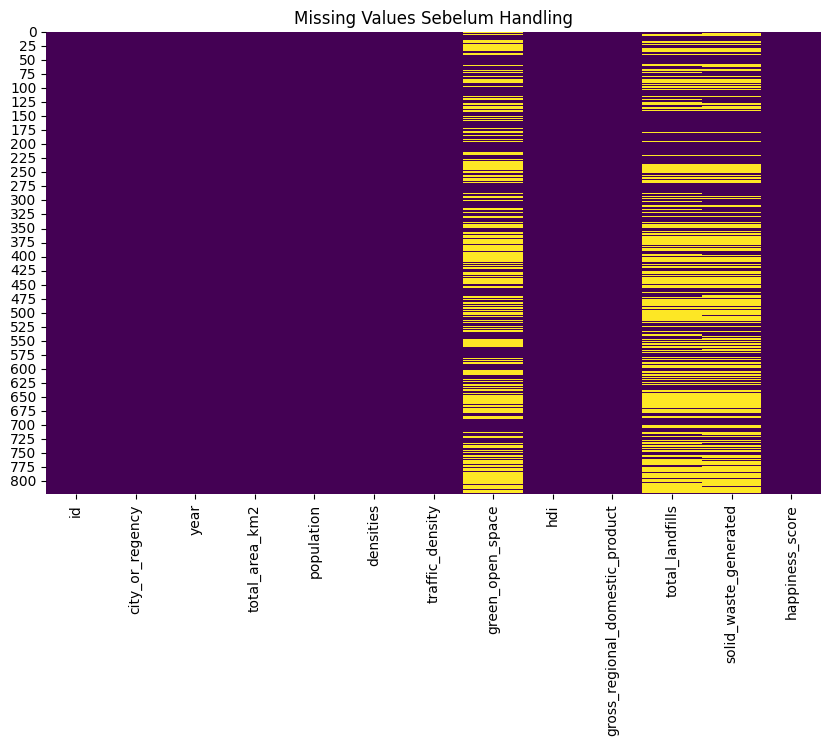

In [11]:
# Sebelum handling missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Sebelum Handling")
plt.show()

In [12]:
# Fill remaining missing values (simple fill with median here)
for col in train_df.columns:
    if train_df[col].isnull().sum() > 0:
        train_df[col] = train_df[col].fillna(train_df[col].median())

for col in test_df.columns:
    if test_df[col].isnull().sum() > 0:
        test_df[col] = test_df[col].fillna(test_df[col].median())

In [13]:
# Categorical: fill with mode
from sklearn.impute import SimpleImputer # Import SimpleImputer
if categorical_features:
    categorical_imputer = SimpleImputer(strategy='most_frequent')
    train_df[categorical_features] = categorical_imputer.fit_transform(train_df[categorical_features])
    test_df[categorical_features] = categorical_imputer.transform(test_df[categorical_features])

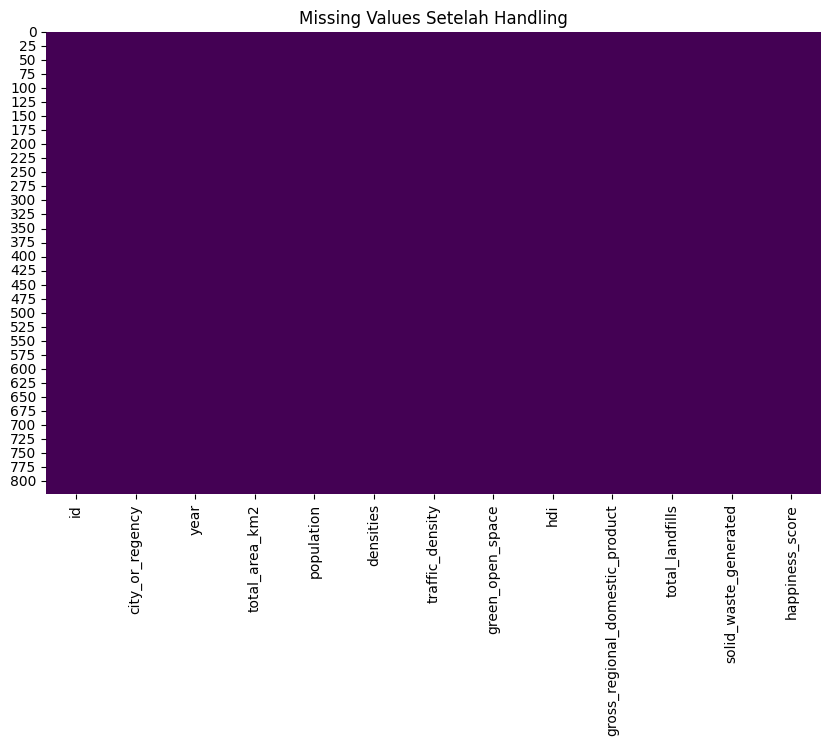

In [14]:
# Setelah handling missing values
plt.figure(figsize=(10, 6))
sns.heatmap(train_df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Setelah Handling")
plt.show()

**3.3 ENCODING CATEGORICAL**

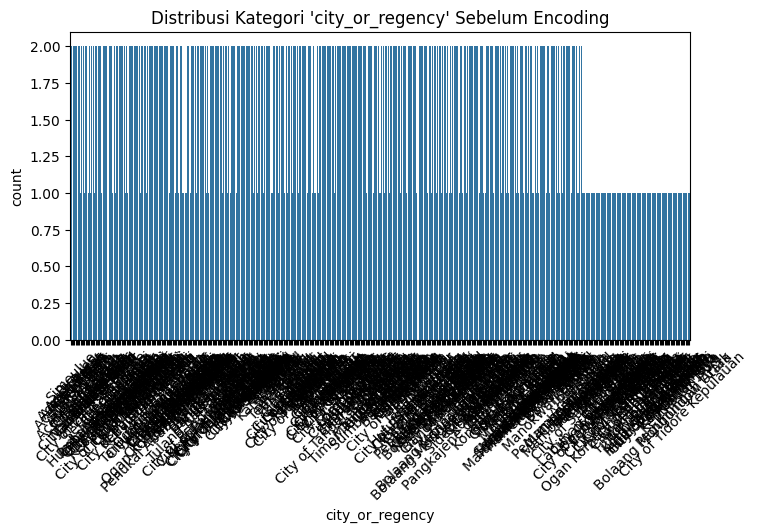

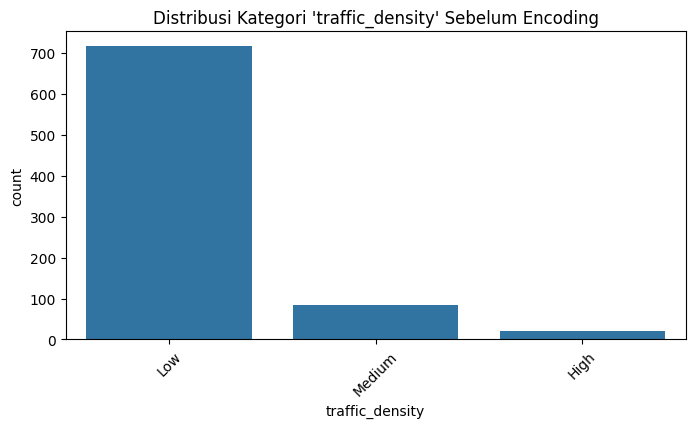

In [15]:
# Sebelum encoding
if categorical_features:
    for col in categorical_features:
        plt.figure(figsize=(8, 4))
        sns.countplot(x=col, data=train_df)
        plt.title(f"Distribusi Kategori '{col}' Sebelum Encoding")
        plt.xticks(rotation=45)
        plt.show()

In [16]:
from sklearn.preprocessing import OrdinalEncoder

# Encode categorical features
if categorical_features:
    oe = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)  # supaya data baru/beda tidak error
    train_df[categorical_features] = oe.fit_transform(train_df[categorical_features])
    test_df[categorical_features] = oe.transform(test_df[categorical_features])


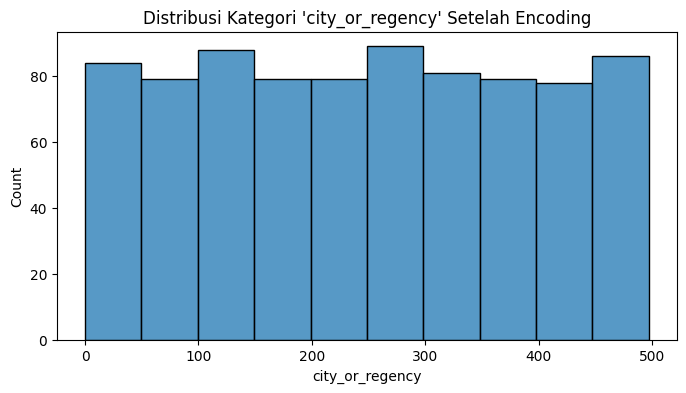

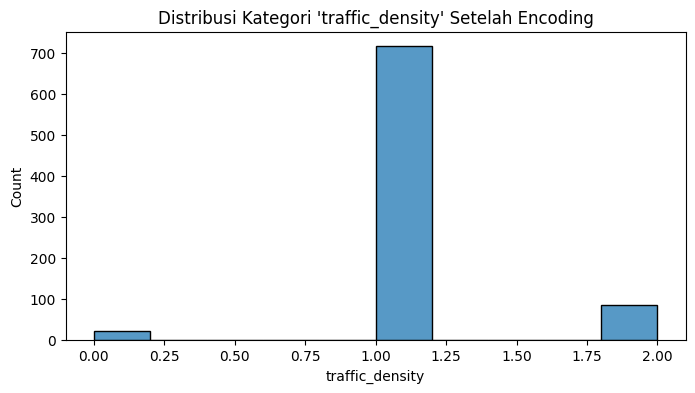

   city_or_regency  traffic_density
0            436.0              1.0
1              4.0              1.0
2              8.0              1.0
3              7.0              1.0
4              0.0              1.0


In [17]:
# Setelah encoding
if categorical_features:
    for col in categorical_features:
        plt.figure(figsize=(8, 4))
        sns.histplot(train_df[col], kde=False, bins=10)
        plt.title(f"Distribusi Kategori '{col}' Setelah Encoding")
        plt.show()

print(train_df[categorical_features].head())

**3.4 HANDLE DUPLICATES**

In [18]:
# Check for duplicates
duplicate_rows = train_df[train_df.duplicated()]
print(f"\nDuplicate Rows Found: {len(duplicate_rows)}")
if len(duplicate_rows) > 0:
    train_df = train_df.drop_duplicates()


Duplicate Rows Found: 0


**3.5 FEATURE SCALING**

In [19]:
# Scaling numeric features
scaler = StandardScaler()
features_to_scale = ['densities', 'green_open_space', 'hdi', 'gross_regional_domestic_product',
                     'solid_waste_generated', 'total_landfills', 'total_area_km2', 'population']

train_df[features_to_scale] = scaler.fit_transform(train_df[features_to_scale])
test_df[features_to_scale] = scaler.transform(test_df[features_to_scale])

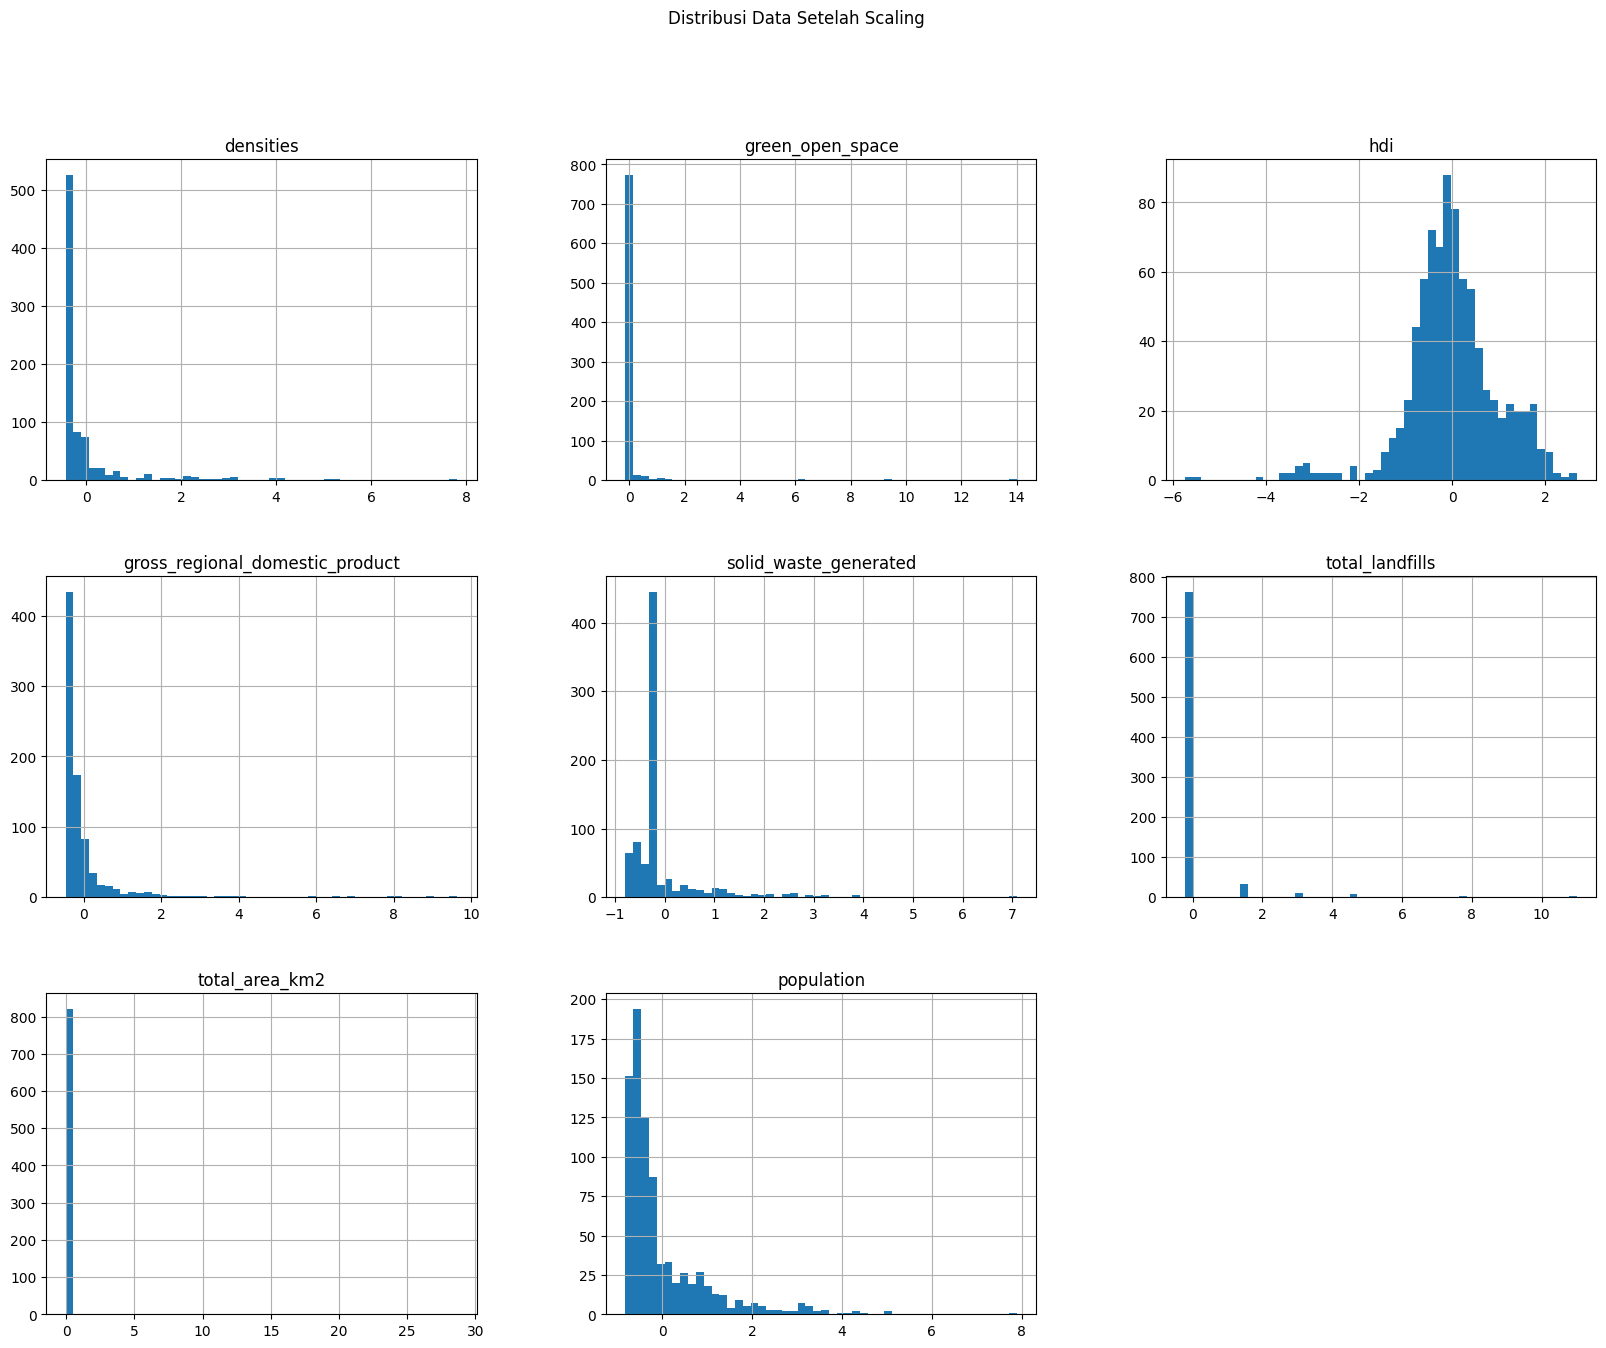

In [20]:
train_df[features_to_scale].hist(bins=50, figsize=(20, 15))
plt.suptitle("Distribusi Data Setelah Scaling")
plt.grid(True)  # Tambahkan grid
plt.show()

**3.6 FINAL CHECK**

In [21]:
print("Train Data after cleaning:")
print(train_df.head())

print("\nTest Data after cleaning:")
print(test_df.head())

Train Data after cleaning:
         id  city_or_regency  year  total_area_km2  population  densities  \
0  11012022            436.0  2022       -0.035795   -0.710240  -0.412384   
1  11032022              4.0  2022       -0.034800   -0.486198  -0.410431   
2  11042022              8.0  2022       -0.034771   -0.500455  -0.411566   
3  11062022              7.0  2022       -0.034650   -0.509315  -0.413292   
4  11072022              0.0  2022       -0.035331   -0.540468  -0.405813   

   traffic_density  green_open_space       hdi  \
0              1.0         -0.144710 -0.591106   
1              1.0         -0.143136 -0.498012   
2              1.0         -0.143136 -0.117879   
3              1.0         -0.142674  0.445338   
4              1.0         -0.144936  0.195537   

   gross_regional_domestic_product  total_landfills  solid_waste_generated  \
0                        -0.433898        -0.216424              -0.686877   
1                        -0.389738        -0.216424  

**3.7 Korelasi Antar Fitur**

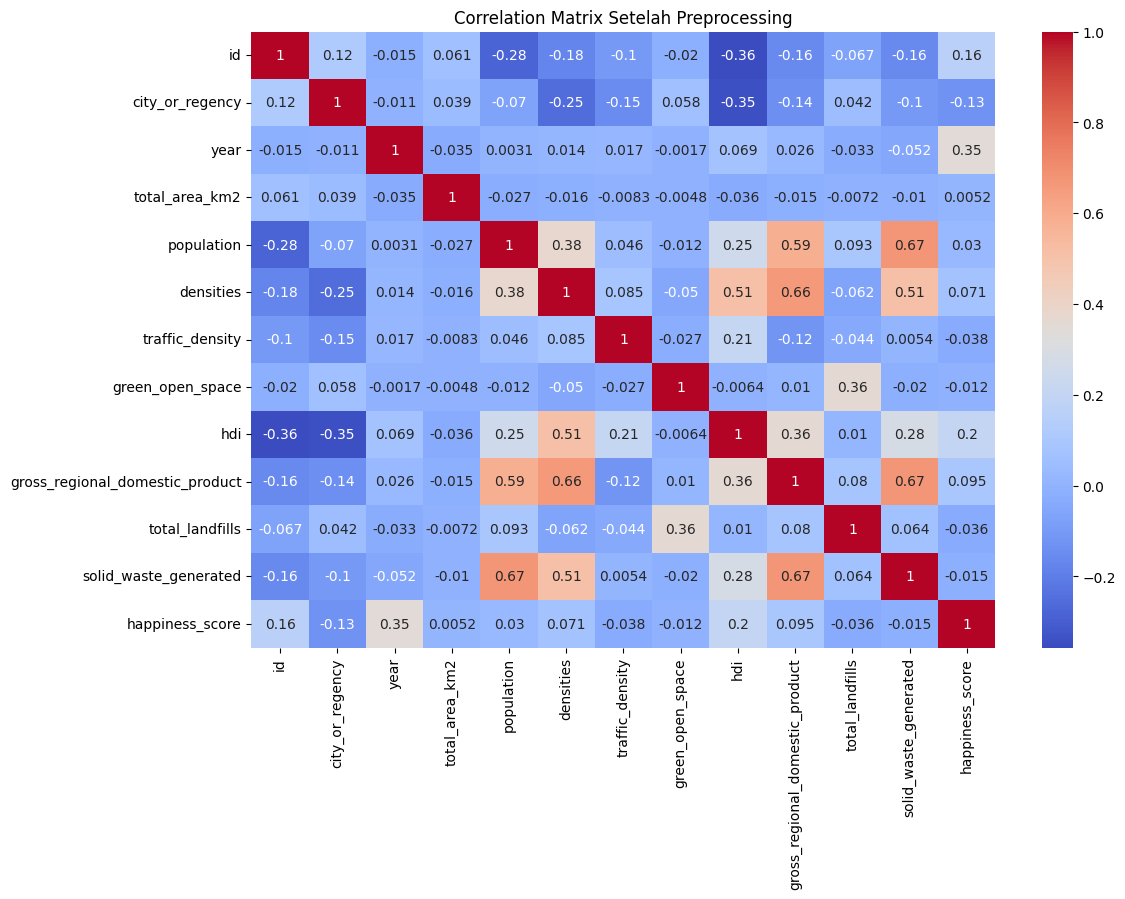

In [22]:
# Korelasi antar fitur setelah preprocessing
corr_matrix = train_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix Setelah Preprocessing")
plt.show()

**3.8. Splitting Data**

In [ ]:
from sklearn.model_selection import train_test_split

features = ['densities', 'traffic_density', 'green_open_space', 'hdi', 
            'gross_regional_domestic_product', 'total_landfills', 'solid_waste_generated']

# Memisahkan fitur dan label dari data training
X = train_df[features]
y = train_df['happiness_score']

# Memisahkan data menjadi data latih dan data validasi (80:20 split)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Memisahkan fitur dari data test
X_test = test_df[features]

# Validasi hasil splitting
print("Shape of X_train:", X_train.shape)
print("Shape of X_val:", X_val.shape)
print("Shape of X_test:", X_test.shape)

Shape of X_train: (657, 7)
Shape of X_val: (165, 7)
Shape of X_test: (206, 7)


**4. Modeling**



In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

model = LinearRegression()

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data validasi
y_pred_val = model.predict(X_val)

# Evaluasi model
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Mean Squared Error (MSE) on validation set:", mse_val)
print("R-squared (R2) on validation set:", r2_val)

Mean Squared Error (MSE) on validation set: 6.204609805658558
R-squared (R2) on validation set: 0.0840451803975506


In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data validasi
y_pred_val = model.predict(X_val)

# Evaluasi model
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Random Forest - Mean Squared Error (MSE) on validation set:", mse_val)
print("Random Forest - R-squared (R2) on validation set:", r2_val)

Random Forest - Mean Squared Error (MSE) on validation set: 5.694391507030282
Random Forest - R-squared (R2) on validation set: 0.15936609892682274


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=3, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data validasi
y_pred_val = model.predict(X_val)

# Evaluasi model
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("Gradient Boosting - Mean Squared Error (MSE) on validation set:", mse_val)
print("Gradient Boosting - R-squared (R2) on validation set:", r2_val)

Gradient Boosting - Mean Squared Error (MSE) on validation set: 6.3344658900749
Gradient Boosting - R-squared (R2) on validation set: 0.06487519064777203


In [ ]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Latih model
model.fit(X_train, y_train)

# Prediksi pada data validasi
y_pred_val = model.predict(X_val)

# Evaluasi model
mse_val = mean_squared_error(y_val, y_pred_val)
r2_val = r2_score(y_val, y_pred_val)

print("XGBoost - Mean Squared Error (MSE) on validation set:", mse_val)
print("XGBoost - R-squared (R2) on validation set:", r2_val)

XGBoost - Mean Squared Error (MSE) on validation set: 6.503724454924537
XGBoost - R-squared (R2) on validation set: 0.03988841418817424


**5. Hyperparameter Tuning**

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

#model
rf = RandomForestRegressor(random_state=42)

#parameter yang akan diuji
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10, 15]
}

#GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_train, y_train)

# Model terbaik
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

Fitting 3 folds for each of 64 candidates, totalling 192 fits
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=100; total time=   0.1s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=200; total time=   0.3s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=300; total time=   0.5s
[CV] END max_depth=None, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, min_samples_split=2, n_estimators=500; total time=   0.9s
[CV] END max_depth=None, 

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Prediksi pada data validasi menggunakan model terbaik
y_pred_val_best = best_model.predict(X_val)

# Evaluasi model terbaik
mse_val_best = mean_squared_error(y_val, y_pred_val_best)
r2_val_best = r2_score(y_val, y_pred_val_best)

print("Best Model - Mean Squared Error (MSE) on validation set:", mse_val_best)
print("Best Model - R-squared (R2) on validation set:", r2_val_best)

Best Model - Mean Squared Error (MSE) on validation set: 5.866544373821977
Best Model - R-squared (R2) on validation set: 0.1339520514709417


**6. Prediksi pada Data Test**

In [41]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
# Prediksi pada data test
y_pred_test = model.predict(X_test)

# Membulatkan hasil prediksi
y_pred_test_rounded = [round(pred, 2) for pred in y_pred_test]

# Simpan hasil prediksi ke file CSV
test_ids = test_df['id']  # Kolom ID dari data test
predictions = pd.DataFrame({
    'ID': test_ids,
    'Predicted_Happiness_Score': y_pred_test_rounded
})
predictions.to_csv('predictions.csv', index=False)
print("Predictions saved to predictions.csv")

Predictions saved to predictions.csv


In [42]:
# Tampilkan beberapa hasil prediksi pada data test
test_df['Predicted_Happiness_Score'] = y_pred_test
print(test_df[['id', 'Predicted_Happiness_Score']].head(10))  # Tampilkan 10 baris pertama

         id  Predicted_Happiness_Score
0  11022022                    74.0763
1  11052022                    73.2801
2  11092022                    72.6794
3  11182022                    73.8772
4  11752022                    74.8035
5  12052022                    74.2933
6  12082022                    72.6903
7  12112022                    75.1464
8  12122022                    73.7185
9  12162022                    74.7632


**7. Dokumentasi dan Visualisasi Hasil**

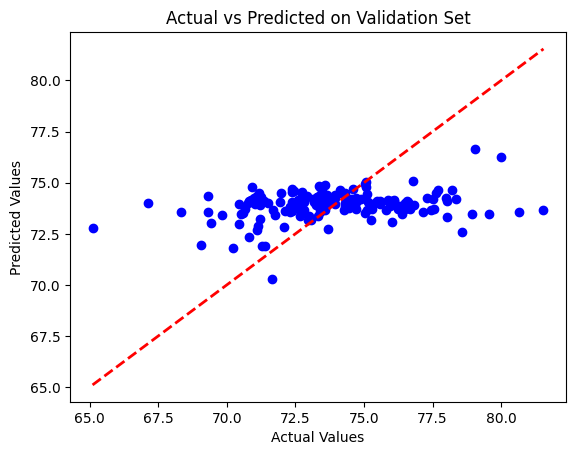

In [ ]:
#garis diagonal untuk referensi
plt.scatter(y_val, y_pred_val, color='blue')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted on Validation Set")
plt.show()